In [1]:
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
from gym import wrappers

import numpy as np
import pandas as pd
# import random
import time

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def value_iteration(env, gamma , max_iterations):
    """ Value-iteration algorithm """
    v = np.zeros(num_states)  # initialize value-function
    # max_iterations = 100
    eps = 1e-10
    val = []
    delta_list = []
    i = 0
    for i in range(max_iterations):
        delta = 0
        prev_v = np.copy(v)
        for s in range(num_states):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(num_actions)] 
            v[s] = max(q_sa)
            delta = abs(np.sum(np.fabs(prev_v - v)))
        delta_list.append(delta)
            # val.append(abs(prev_v-v[s]))
        val.append(np.copy(v))
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
        i += 1
    return v,val, delta_list, i

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(num_states)
    for s in range(num_states):
        q_sa = np.zeros(num_actions)
        for a in range(num_actions):
            for p, s_, r, _ in env.P[s][a]:
                # next_sr(p, s_, r, _) is a tuple of (probability, next state, reward, done)
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy

In [4]:
def evaluate_policy(env, policy, gamma = 1.0,  n = 2000):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [run_episode(env, policy, gamma = gamma, render = False) for _ in range(n)]
    return scores

In [5]:
def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.
    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.
    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [6]:
def meanvplot(env, gamma, V): 

  num_init_states = 100
  mean_V = np.zeros(env.observation_space.n)
  for i in range(num_init_states):
      state = env.reset()
      done = False
      while not done:
          action = np.argmax([sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[state][a]]) for a in range(env.action_space.n)])
          state, _, done, _ = env.step(action)
          mean_V[state] += V[state]
  mean_V /= num_init_states

  plt.figure()
  plt.bar(range(env.observation_space.n), mean_V)
  plt.xlabel('State')
  plt.ylabel('Value')
  plt.title('Mean Value Function')
  plt.show()

  # numbers = [np.mean(i) for i in val]
  # # create a range of x-values corresponding to the indices of the list
  # x_values = range(len(numbers))

  # # create a new figure and axis object
  # fig, ax = plt.subplots()
  # ax.plot(x_values, numbers)
  # plt.show()

In [7]:
# https://towardsdatascience.com/this-is-how-reinforcement-learning-works-5080b3a335d6
# function for displaying a heatmap
def display_value_iteration(P, env = gym.make('FrozenLake8x8-v1')):
    nb_states = env.observation_space.n
    visited_states = np.zeros(nb_states).astype(bool)
    visited_states[0] = 1
    states_labels = np.where(P==0, '<', 
                              np.where(P==1, 'v', 
                                       np.where(P==2, '>', 
                                                np.where(P==3, '^', P)
                                               )
                                      )
                             ) 
    desc = env.unwrapped.desc.ravel().astype(str)
    colors = np.where(desc=='S','y',np.where(desc=='F','b',np.where(desc=='H','r',np.where(desc=='G','g',desc))))
    states_labels = np.zeros(nb_states).astype(str)
    states_labels[:] = ''
    total_reward = 0
    s = env.reset()
    #env.render()
    done = False
    while done != True: 
        best_a = P[s] # select the best next action from the policy
        states_labels[s] = '^' if best_a==0 else ('>' if best_a==1 else ('v' if best_a==2 else '<'))   
        #print(s, best_a)
        s, rew, done, info = env.step(best_a) #take step using selected action
        total_reward = total_reward + rew
        visited_states[s] = 1 # mark the state as visited
        #env.render()
    ax = sns.heatmap(P.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 linewidth=0.5, 
                 annot=states_labels.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 cmap=list(colors),
                 fmt = '',
                 cbar=False)
    plt.show()
    print("Total Reward: ", total_reward)

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:601: UserWarning: WARN: Using the latest versioned environment `FrozenLake-v1` instead of the unversioned environment `FrozenLake`.
  logger.warn(


gamma = 0.01
Value-iteration converged at iteration# 351.


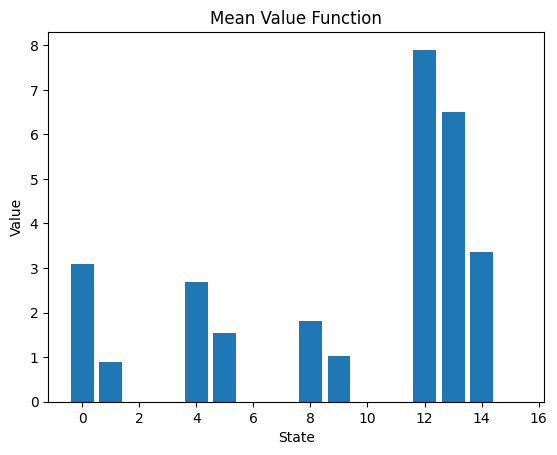

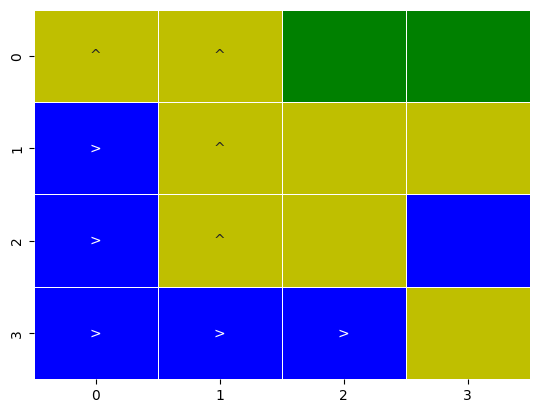

Total Reward:  1.0


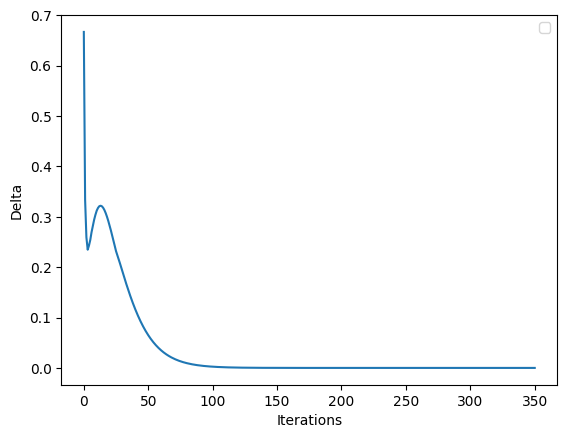

<ipython-input-8-12a8dd56c123>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(perf)


gamma = 0.5
Value-iteration converged at iteration# 351.


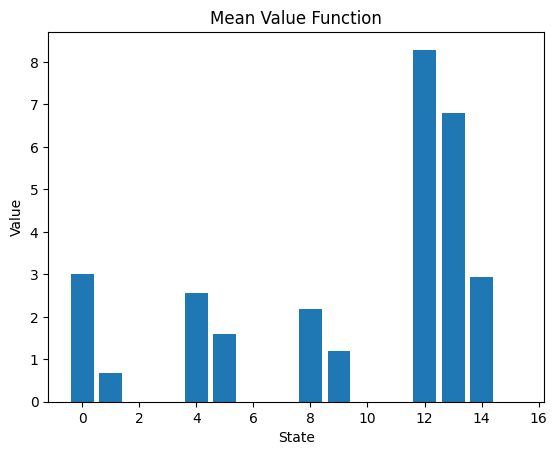

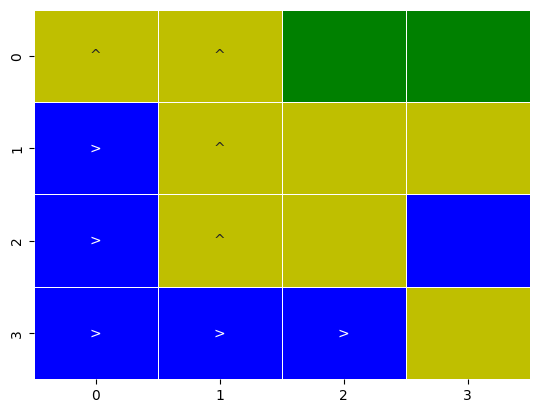

Total Reward:  1.0


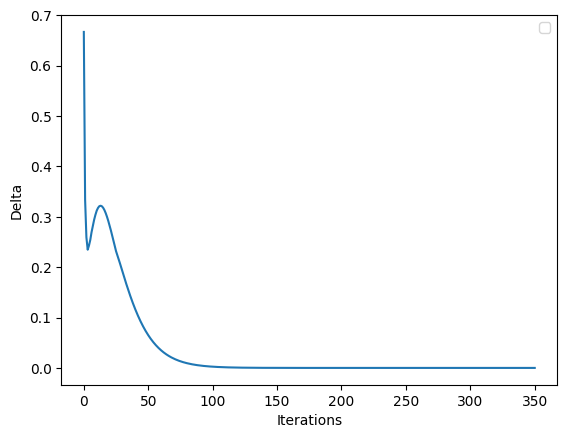

<ipython-input-8-12a8dd56c123>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(perf)


gamma = 0.9
Value-iteration converged at iteration# 351.


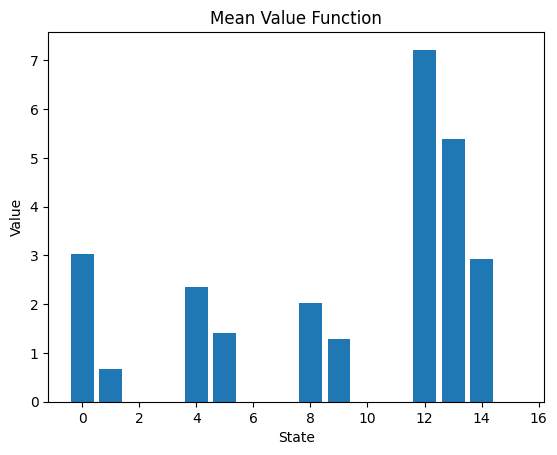

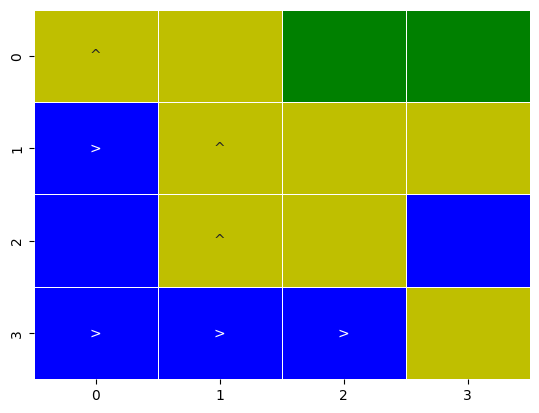

Total Reward:  1.0


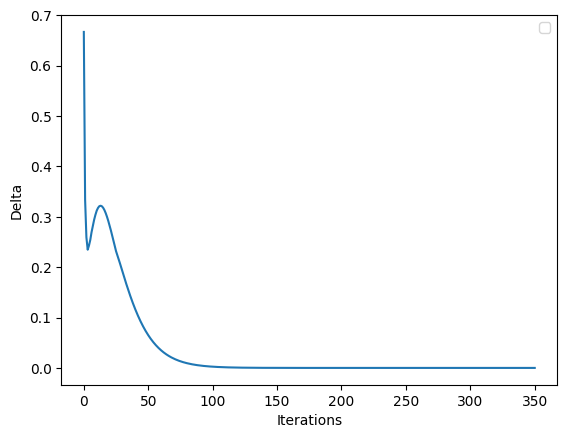

   gamma  len(optiv)                                                 ps  \
0   0.01          16  [1.0000000000000005e-42, 1.0000000000000003e-2...   
0   0.50          16  [0.001953125, 1.4901161193847656e-08, 0.001953...   
0   0.90          16  [0.09847709021836118, 0.10941898913151242, 0.0...   

   policy_score   time                                                 vi  
0       0.00000  0.327  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
0       0.00044  0.346  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
0       0.12702  0.515  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  


<ipython-input-8-12a8dd56c123>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(perf)


In [8]:
# env_name  = 'FrozenLake8x8-v1'
# env = gym.make(env_name)
random_map = generate_random_map(size=4, p=0.8)
env_name  = 'FrozenLake'
env = gym.make(env_name, desc=random_map)
# env = gym.make("FrozenLake-v1", map_name="4x4")
num_states = env.observation_space.n
num_actions = env.action_space.n
output = pd.DataFrame()
for gamma in [0.01, 0.5, 0.9]: #
  print("gamma = " + str(gamma))
  start = time.time()
  max_iterations = 10000
  optimal_v,val, delta_list_vi, i_vi = value_iteration(env, gamma, max_iterations)
  # optimal_v, val = value_iteration(env, gamma, max_iterations)
  policy = extract_policy(optimal_v, gamma)
  policy_scores = evaluate_policy(env, policy, gamma, n=300)
  end = time.time() - start
  # print("Average time: " + str(np.round(end,3)))
  # print('Average score = ', np.mean(policy_scores))
  # meanvplot(val)
  meanvplot(env, gamma, optimal_v)

  display_value_iteration(policy, env = env)

  # Plot delta vs iterations
  # V_pi, delta_list_pi, i_pi = policy_iteration(env)
  y = [np.max(i) for i in delta_list_vi]
  plt.plot(range(i_vi+1), delta_list_vi)
  # plt.plot(range(i_pi), delta_list_pi, label='Policy iteration')
  plt.xlabel('Iterations')
  plt.ylabel('Delta')
  plt.legend()
  plt.show()

  perf = pd.DataFrame({
      'gamma':[gamma],
      'len(optiv)':[len(optimal_v)],
      'ps': [policy_scores],
      'policy_score':[np.round(np.mean(policy_scores),5)],
      'time':[np.round(end,3)],
       'vi': [val]
  })
  output = output.append(perf)
print(output)

In [9]:
display(output)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gamma,len(optiv),ps,policy_score,time,vi
0,0.01,16,"[1.0000000000000005e-42, 1.0000000000000003e-2...",0.00000,0.327,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,0.50,16,"[0.001953125, 1.4901161193847656e-08, 0.001953...",0.00044,0.346,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
0,0.90,16,"[0.09847709021836118, 0.10941898913151242, 0.0...",0.12702,0.515,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


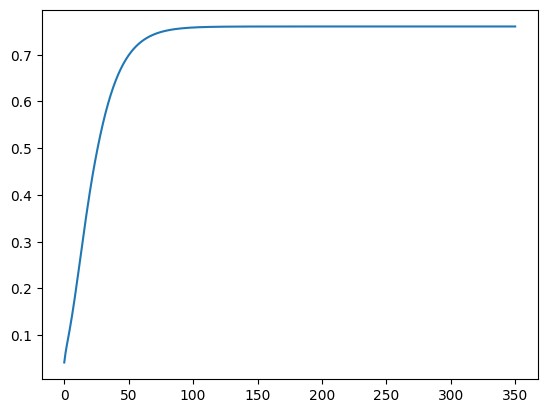

In [10]:
numbers = [np.mean(i) for i in val]
# create a range of x-values corresponding to the indices of the list
x_values = range(len(numbers))

# create a new figure and axis object
fig, ax = plt.subplots()
ax.plot(x_values, numbers)
plt.show()

16x16

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:601: UserWarning: WARN: Using the latest versioned environment `FrozenLake-v1` instead of the unversioned environment `FrozenLake`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API w

gamma = 0.01


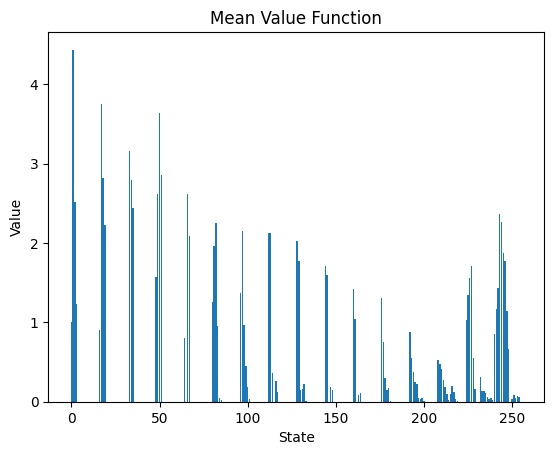

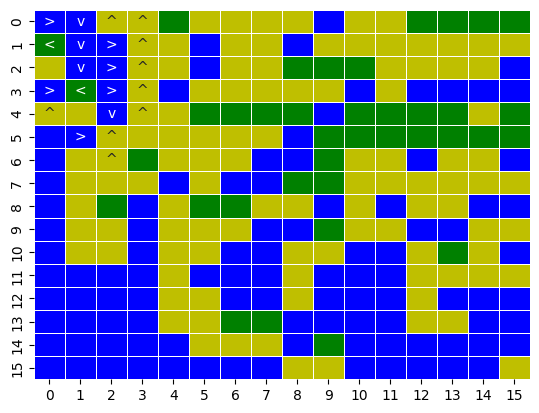

Total Reward:  0.0


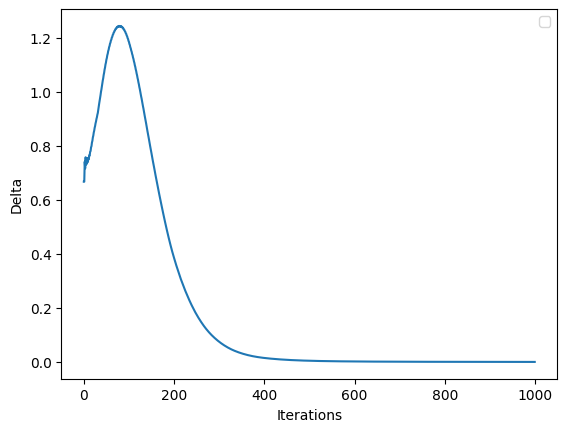

gamma = 0.5


<ipython-input-12-4c6201e38369>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(perf)


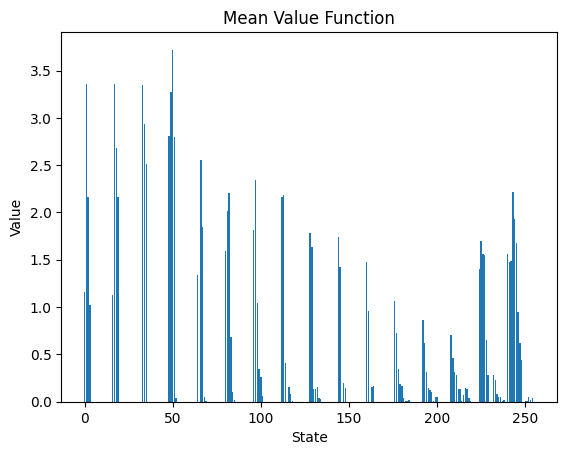

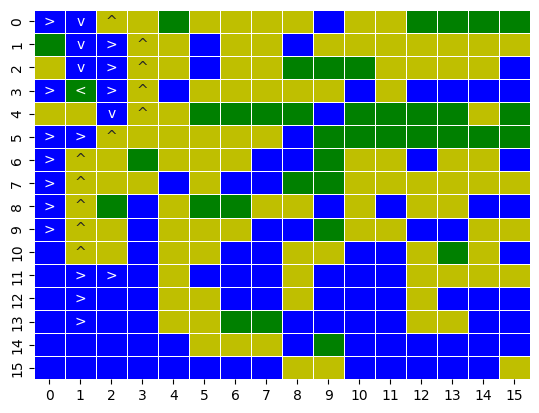

Total Reward:  0.0


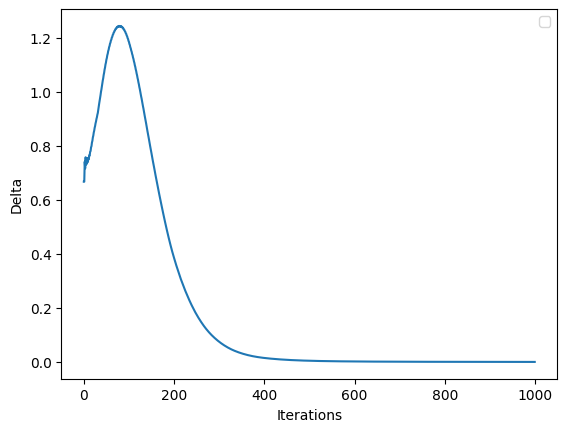

gamma = 0.9


<ipython-input-12-4c6201e38369>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(perf)


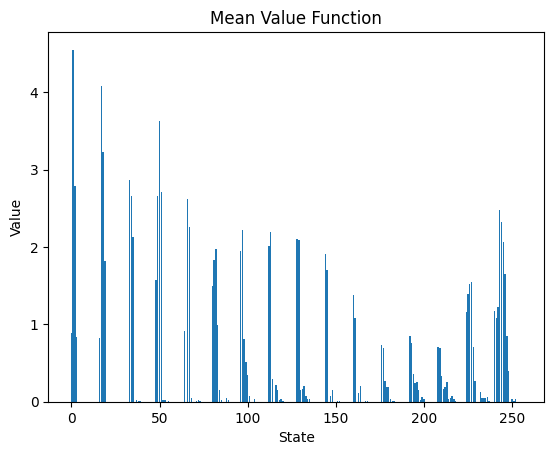

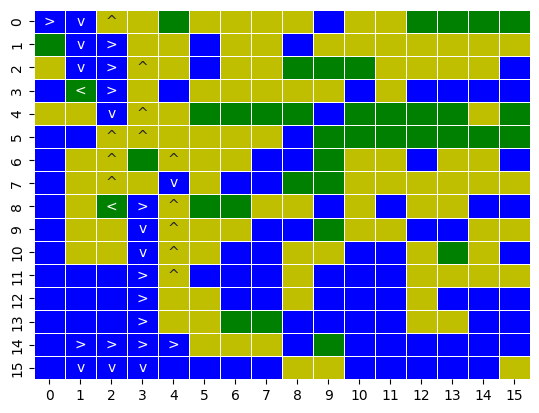

Total Reward:  0.0


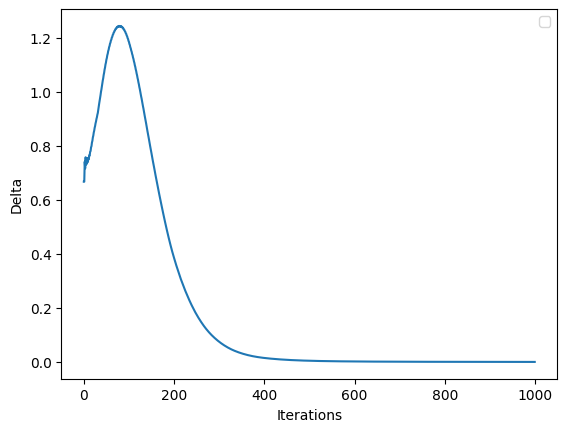

<ipython-input-12-4c6201e38369>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(perf)


   gamma  len(optiv)                                                 ps  \
0   0.01         256  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0   0.50         256  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0   0.90         256  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

   policy_scores    time                                                 vi  
0            0.0  15.555  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
0            0.0  10.552  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
0            0.0   6.824  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  


In [12]:
from gym.envs.toy_text.frozen_lake import generate_random_map
random_map = generate_random_map(size=16, p=0.9)
env_name  = 'FrozenLake'
env = gym.make(env_name, desc=random_map)
num_states = env.observation_space.n
num_actions = env.action_space.n
output = pd.DataFrame()
for gamma in [0.01, 0.5, 0.9]: #
  print("gamma = " + str(gamma))
  start = time.time()
  max_iterations = 1000
  optimal_v,val, delta_list_vi, i_vi = value_iteration(env, gamma, max_iterations)
  # optimal_v, val = value_iteration(env, gamma, max_iterations)
  policy = extract_policy(optimal_v, gamma)
  policy_scores = evaluate_policy(env, policy, gamma, n=300)
  end = time.time() - start
  # print("Average time: " + str(np.round(end,3)))
  # print('Average score = ', np.mean(policy_scores))
  # meanvplot(val)
  meanvplot(env, gamma, optimal_v)

  display_value_iteration(policy, env = env)

  # Plot delta vs iterations
  # V_pi, delta_list_pi, i_pi = policy_iteration(env)
  y = [np.max(i) for i in delta_list_vi]
  plt.plot(range(i_vi), delta_list_vi)
  # plt.plot(range(i_pi), delta_list_pi, label='Policy iteration')
  plt.xlabel('Iterations')
  plt.ylabel('Delta')
  plt.legend()
  plt.show()

  perf = pd.DataFrame({
      'gamma':[gamma],
      'len(optiv)':[len(optimal_v)],
      'ps': [policy_scores],
      'policy_scores':[np.round(np.mean(policy_scores),5)],
      'time':[np.round(end,3)],
       'vi': [val]
  })
  output = output.append(perf)
print(output)

In [ ]:
test

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:601: UserWarning: WARN: Using the latest versioned environment `FrozenLake-v1` instead of the unversioned environment `FrozenLake`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


gamma:  0.01
time:  0.008
value:  9  policy:  7
score:  0.0


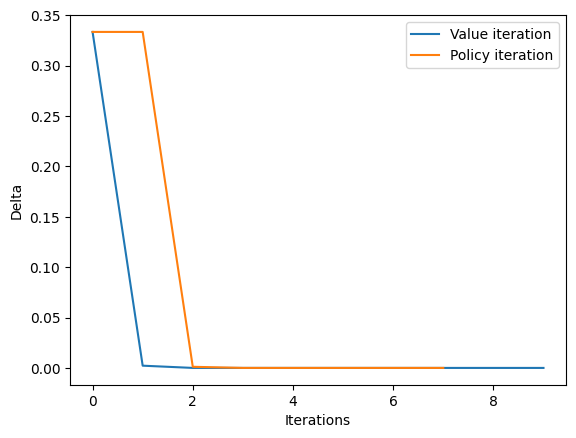

gamma:  0.5
time:  0.02
value:  41  policy:  10
score:  0.0


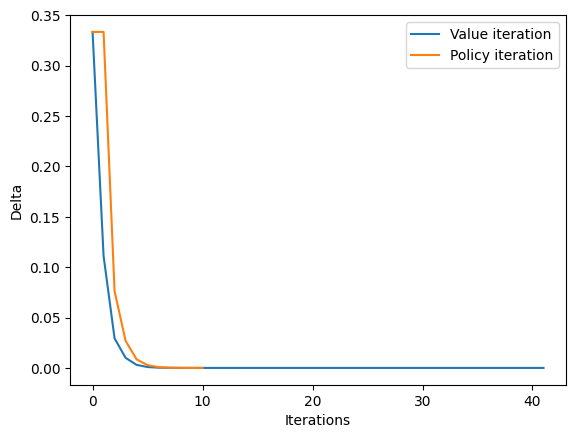

gamma:  0.9
time:  0.056
value:  172  policy:  8
score:  0.0


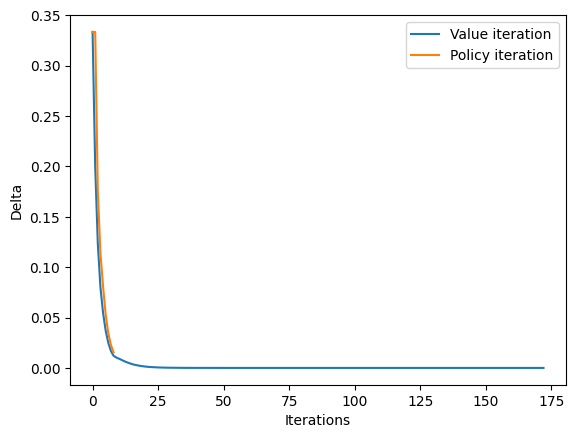

In [13]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map


# env = gym.make('FrozenLake8x8-v1')
# env = gym.make("FrozenLake-v1", map_name="4x4")
random_map = generate_random_map(size=4, p=0.8)
env_name  = 'FrozenLake'
env = gym.make(env_name, desc=random_map)
n_states = env.observation_space.n
n_actions = env.action_space.n

def value_iteration(env, gamma, theta=1e-20):
    # Initialization
    V = np.zeros(n_states)
    delta_list = []

    # Value iteration loop
    i = 0
    while True:
        delta = 0
        for s in range(n_states):
            v_prev = V[s]
            V[s] = max([sum([p*(r+gamma*V[s_]) for p, s_, r, _ in env.env.P[s][a]]) for a in range(n_actions)])
            delta = max(delta, abs(v_prev - V[s]))
        delta_list.append(delta)
        if delta < theta:
            break
        i += 1

    return V, delta_list, i

def policy_iteration(env, gamma, theta=1e-20):
    # Initialization
    V = np.zeros(n_states)
    policy = np.zeros(n_states, dtype=int)
    delta_list = []

    # Policy iteration loop
    i = 0
    while True:
        # Policy evaluation
        delta = 0
        for s in range(n_states):
            v_prev = V[s]
            V[s] = sum([p*(r+gamma*V[s_]) for p, s_, r, _ in env.env.P[s][policy[s]]])
            delta = max(delta, abs(v_prev - V[s]))
        delta_list.append(delta)

        # Policy improvement
        policy_stable = True
        for s in range(n_states):
            old_action = policy[s]
            policy[s] = np.argmax([sum([p*(r+gamma*V[s_]) for p, s_, r, _ in env.env.P[s][a]]) for a in range(n_actions)])
            if old_action != policy[s]:
                policy_stable = False
        if policy_stable:
            break
        i += 1

    return V, delta_list, i

for gamma in [0.01, 0.5, 0.9]: 
  print('gamma: ', gamma)
  start = time.time()
  # Value iteration
  V_vi, delta_list_vi, i_vi = value_iteration(env, gamma)

  # Policy iteration
  V_pi, delta_list_pi, i_pi = policy_iteration(env, gamma)
  print('time: ', np.round(time.time()-start,3))
  print('value: ', i_vi, ' policy: ', i_pi)

  print('score: ', np.mean(evaluate_policy(env, V_pi, gamma = gamma,  n = 5000)))
  # Plot delta vs iterations
  plt.plot(range(i_vi+1), delta_list_vi, label='Value iteration')
  plt.plot(range(i_pi+1), delta_list_pi, label='Policy iteration')
  plt.xlabel('Iterations')
  plt.ylabel('Delta')
  plt.legend()
  plt.show()


gamma:  0.01
time:  0.304
value:  5  policy:  31


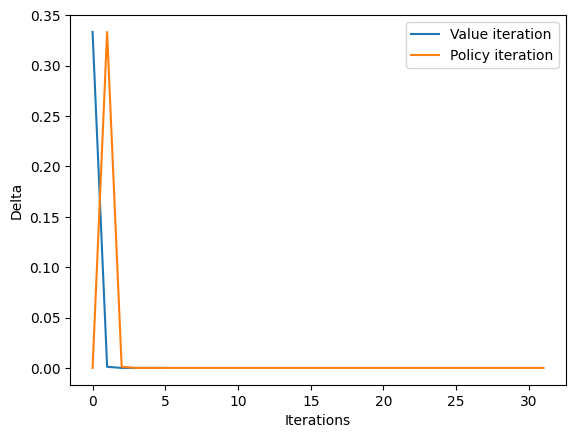

gamma:  0.5
time:  0.338
value:  21  policy:  31


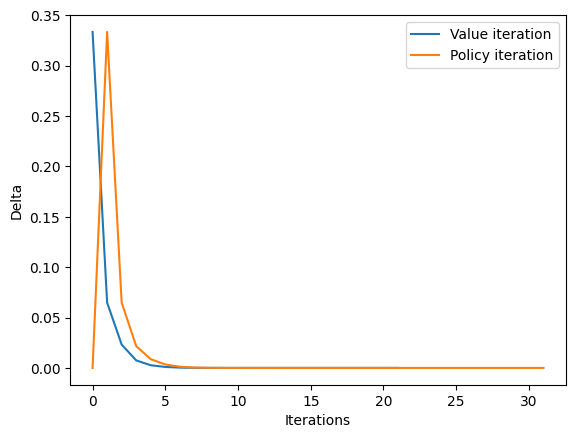

gamma:  0.9
time:  0.765
value:  96  policy:  31


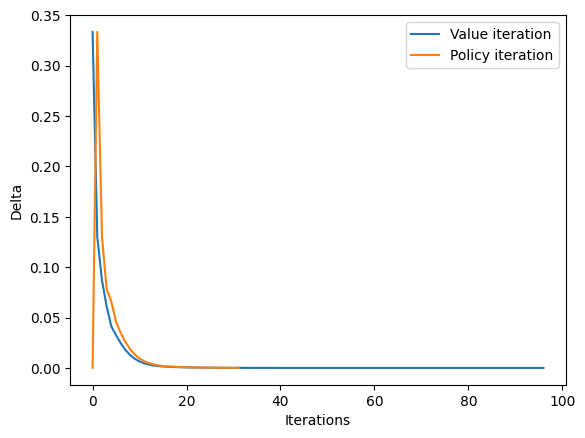

In [14]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# env = gym.make('FrozenLake8x8-v1')
# env = gym.make("FrozenLake-v1", map_name="4x4")
random_map = generate_random_map(size=16, p=0.8)
env_name  = 'FrozenLake'
env = gym.make(env_name, desc=random_map)
n_states = env.observation_space.n
n_actions = env.action_space.n

def value_iteration(env, gamma, theta=1e-10):
    # Initialization
    V = np.zeros(n_states)
    delta_list = []

    # Value iteration loop
    i = 0
    while True:
        delta = 0
        for s in range(n_states):
            v_prev = V[s]
            V[s] = max([sum([p*(r+gamma*V[s_]) for p, s_, r, _ in env.env.P[s][a]]) for a in range(n_actions)])
            delta = max(delta, abs(v_prev - V[s]))
        delta_list.append(delta)
        if delta < theta:
            break
        i += 1

    return V, delta_list, i

def policy_iteration(env, gamma, theta=1e-10):
    # Initialization
    V = np.zeros(n_states)
    policy = np.zeros(n_states, dtype=int)
    delta_list = []

    # Policy iteration loop
    i = 0
    while True:
        # Policy evaluation
        delta = 0
        for s in range(n_states):
            v_prev = V[s]
            V[s] = sum([p*(r+gamma*V[s_]) for p, s_, r, _ in env.env.P[s][policy[s]]])
            delta = max(delta, abs(v_prev - V[s]))
        delta_list.append(delta)

        # Policy improvement
        policy_stable = True
        for s in range(n_states):
            old_action = policy[s]
            policy[s] = np.argmax([sum([p*(r+gamma*V[s_]) for p, s_, r, _ in env.env.P[s][a]]) for a in range(n_actions)])
            if old_action != policy[s]:
                policy_stable = False
        if policy_stable:
            break
        i += 1

    return V, delta_list, i

for gamma in [0.01, 0.5, 0.9]: 
  print('gamma: ', gamma)
  start = time.time()
  # Value iteration
  V_vi, delta_list_vi, i_vi = value_iteration(env, gamma)

  # Policy iteration
  V_pi, delta_list_pi, i_pi = policy_iteration(env, gamma)
  print('time: ', np.round(time.time()-start,3))
  print('value: ', i_vi, ' policy: ', i_pi)

  # print('score: ', np.mean(evaluate_policy(env, V_pi, gamma = gamma,  n = 1000)))
  # Plot delta vs iterations
  plt.plot(range(i_vi+1), delta_list_vi, label='Value iteration')
  plt.plot(range(i_pi+1), delta_list_pi, label='Policy iteration')
  plt.xlabel('Iterations')
  plt.ylabel('Delta')
  plt.legend()
  plt.show()


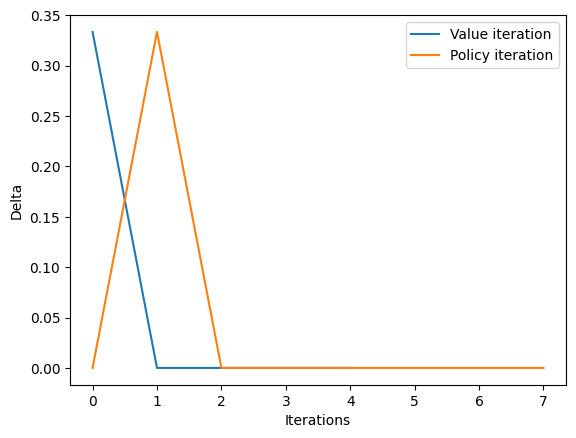

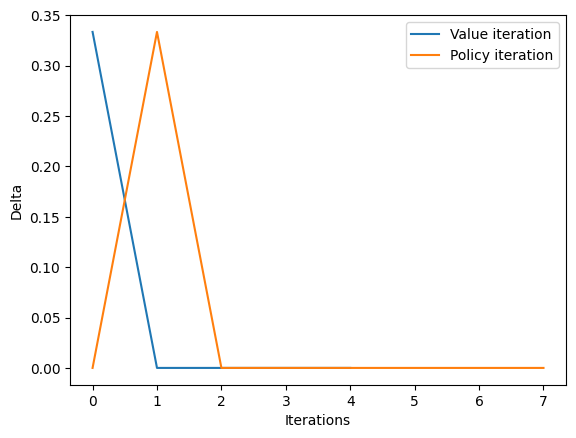

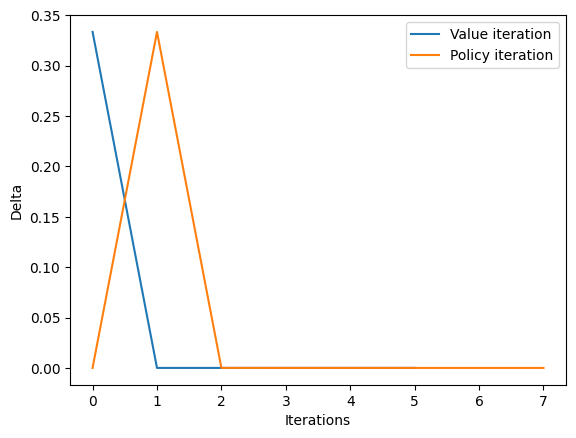

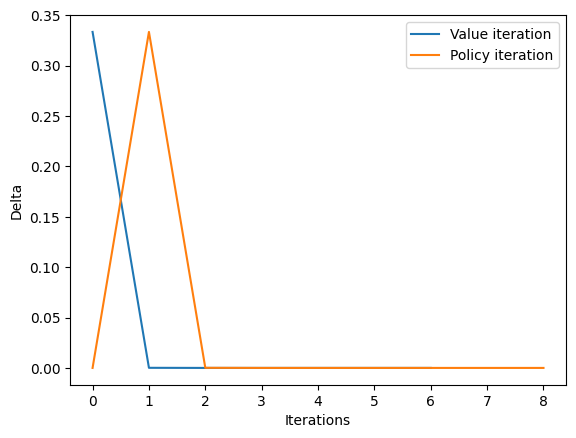

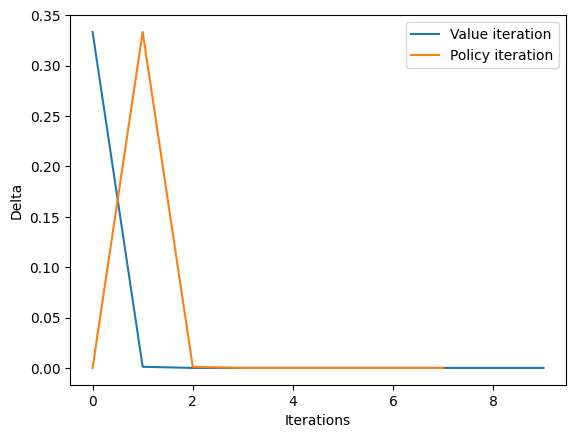

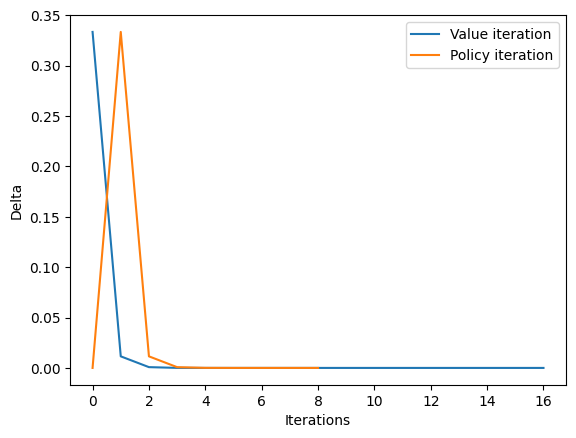

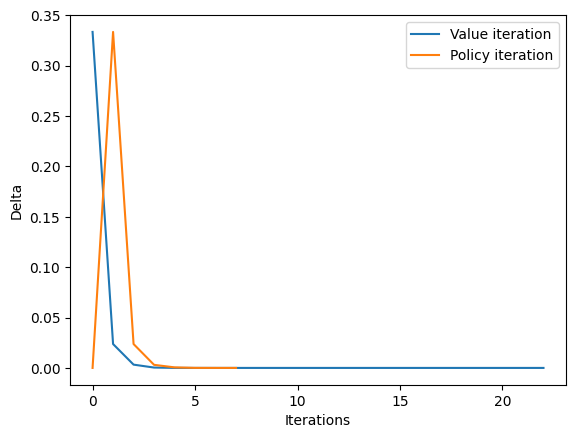

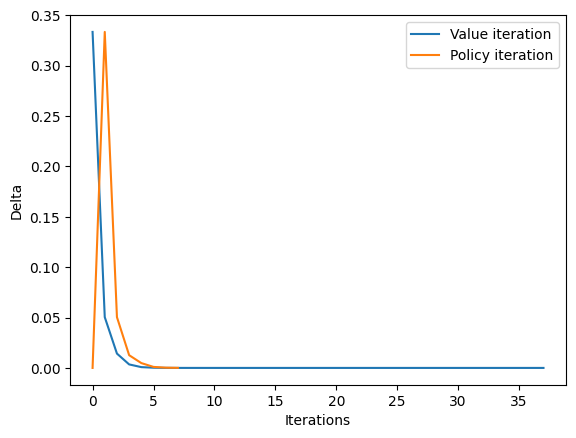

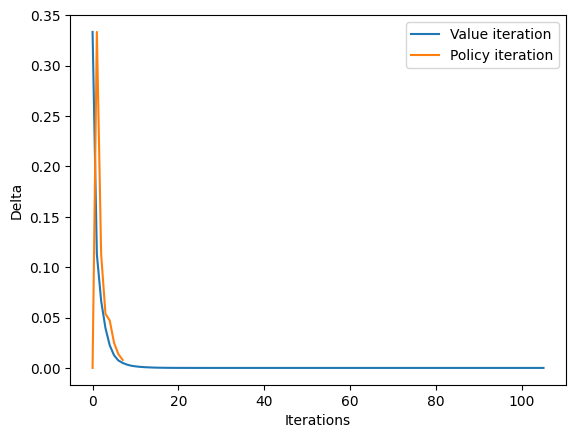

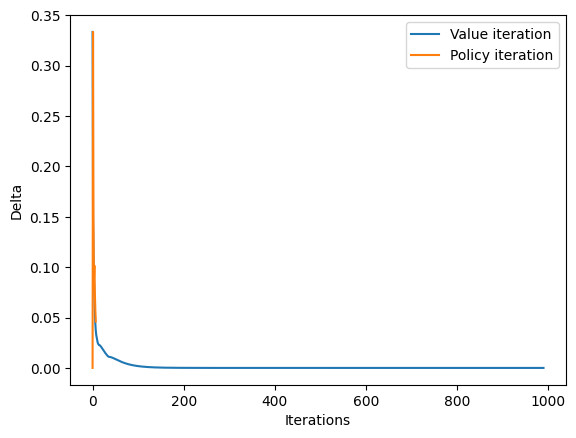

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# env = gym.make('FrozenLake8x8-v1')
env = gym.make("FrozenLake-v1", map_name="4x4")

n_states = env.observation_space.n
n_actions = env.action_space.n

def value_iteration(env, gamma=0.1, theta=1e-20):
    # Initialization
    V = np.zeros(n_states)
    delta_list = []

    # Value iteration loop
    i = 0
    while True:
        delta = 0
        for s in range(n_states):
            v_prev = V[s]
            V[s] = max([sum([p*(r+gamma*V[s_]) for p, s_, r, _ in env.env.P[s][a]]) for a in range(n_actions)])
            delta = max(delta, abs(v_prev - V[s]))
        delta_list.append(delta)
        if delta < theta:
            break
        i += 1

    return V, delta_list, i

def policy_iteration(env, gamma=0.1, theta=1e-20):
    # Initialization
    V = np.zeros(n_states)
    policy = np.zeros(n_states, dtype=int)
    delta_list = []

    # Policy iteration loop
    i = 0
    while True:
        # Policy evaluation
        delta = 0
        for s in range(n_states):
            v_prev = V[s]
            V[s] = sum([p*(r+gamma*V[s_]) for p, s_, r, _ in env.env.P[s][policy[s]]])
            delta = max(delta, abs(v_prev - V[s]))
        delta_list.append(delta)

        # Policy improvement
        policy_stable = True
        for s in range(n_states):
            old_action = policy[s]
            policy[s] = np.argmax([sum([p*(r+gamma*V[s_]) for p, s_, r, _ in env.env.P[s][a]]) for a in range(n_actions)])
            if old_action != policy[s]:
                policy_stable = False
        if policy_stable:
            break
        i += 1

    return V, delta_list, i
for gamma in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.8, 0.9]:
  # Value iteration
  V_vi, delta_list_vi, i_vi = value_iteration(env,gamma)

  # Policy iteration
  V_pi, delta_list_pi, i_pi = policy_iteration(env,gamma)

  # Plot delta vs iterations
  plt.plot(range(i_vi+1), delta_list_vi, label='Value iteration')
  plt.plot(range(i_pi+1), delta_list_pi, label='Policy iteration')
  plt.xlabel('Iterations')
  plt.ylabel('Delta')
  plt.legend()
  plt.show()


In [2]:
for lr in [0.01, 0.5, 0.9]:
  for ga in [0.01, 0.5, 0.9]:
    print('lr',lr, 'ga', ga)

lr 0.01 ga 0.01
lr 0.01 ga 0.5
lr 0.01 ga 0.9
lr 0.5 ga 0.01
lr 0.5 ga 0.5
lr 0.5 ga 0.9
lr 0.9 ga 0.01
lr 0.9 ga 0.5
lr 0.9 ga 0.9
